In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pyrex
#import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os
import sys
import seaborn as sns
import polReco_util as util
import scipy

import ROOT
from ROOT import TCanvas, TGraph
from ROOT import gROOT
from ROOT import gInterpreter, gSystem
from ROOT import TChain, TSelector, TTree
from scipy.stats import norm
from scipy.stats import rayleigh

#add headers from AraSim. Not sure if all of them are needed, and I'm lazy to check that. MAK SURE to change the location of the headers
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Position.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Report.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Detector.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Settings.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/EarthModel.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Event.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Spectra.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Interaction.h"')


gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/libRootFftwWrapper/include/FFTtools.h"')


# gSystem.Load('/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/libAra.so') #load the simulation event library. You might get an error asking for the eventSim dictionry. To solve that, go to where you compiled AraSim, find that file, and copy it to where you set LD_LIBRARY_PATH.
# gSystem.Load('/cvmfs/ara.opensciencegrid.org/trunk/centos7/ara_build/lib/libAraEvent.so')
gSystem.Load('/users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build/lib/libAraEvent.so')
gSystem.Load("/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/libRootFftwWrapper/build/libRootFftwWrapper.so")

gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Position.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Report.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Detector.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Settings.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/IceModel.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/EarthModel.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Event.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Spectra.h"')
# gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Interaction.h"')

# sys.path.append("/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/ARA_cvmfs/root_build/lib/") # go to parent dir
#sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")  #I don't have access to this directory in Jorge's account
#sys.path.append("/users/PAS0654/jflaherty13/.local/lib/python3.9/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
# import math
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
#import matplotlib as mpl
#import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
#import itertools

# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
#mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

#current_palette = sns.color_palette('colorblind', 10)
current_palette = sns.color_palette('bright', 10)

/cvmfs/ara.opensciencegrid.org/trunk/centos7/root_build/lib/cppyy/__init__.py:72: DeprecationWarning: invalid escape sequence \d
  if re.match('^libcppyy_backend\d_\d$', lib_name):


Welcome to JupyROOT 6.22/06


Warning in <TClassTable::Add>: class FFTtools::AnalyticSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CompositeSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::BandlimitedSampledSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::ThermalNoise already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::Averager already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::MotherWavelet already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Ricker already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Ridger already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Morlet already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::DigitalFilter already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::DigitalFilterSeries already in T

In [2]:
stationID = 2 #2
runNumber = 12559 #12557
subsetNumber = '' #102
# recoSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelNoNoise/interferometry/recangle_reco_out_run_"+str(runNumber)+".root"
# rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelNoNoise/AraOut.setup_variablePsi.txt.run"+str(runNumber)+".root"


# recoSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGain/interferometry/recangle_reco_out_run_"+str(runNumber)+".root"
# rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGain/AraOut.setup_variablePsi.txt.run"+str(runNumber)+".root"

# recoSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGainNoNoise/interferometry/recangle_reco_out_run_"+str(runNumber)+".root"
# rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGainNoNoise/AraOut.setup_variablePsi="+str(runNumber)+".txt.run"+str(runNumber)+".root"

# recoSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGain/interferometry/recangle_reco_out_run_"+str(runNumber)+".root"
# rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGainNoNoise/AraOut.setup_variablePsi="+str(runNumber)+".txt.run"+str(runNumber)+".root"
# rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGainNoNoiseNoResponse/AraOut.setup_variablePsi="+str(runNumber)+".txt.run"+str(runNumber)+".root"
# rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGainNoResponse/AraOut.setup_variablePsi="+str(runNumber)+".txt.run"+str(runNumber)+".root"
# recoSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/updatedIdlPulseModelHpolGainNoNoiseNoResponse/interferometry/recangle_reco_out_run_"+str(runNumber)+".root"

# rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/test/AraOut.setup_variablePsi="+str(runNumber)+".txt.run"+str(runNumber)+".root"
# recoSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/test/interferometry/recangle_reco_out_run_"+str(runNumber)+".root"

# rawSrcFolder = "/users/PAS0654/jflaherty13/araAnalysis/araRecoAndSourceSearch/ARA_Reconstruction/data/A2/run_012559/split/event0"+str(runNumber)+"__0.root"
# recoSrcFolder = "/users/PAS0654/jflaherty13/araAnalysis/araRecoAndSourceSearch/ARA_Reconstruction/brianInterferometry/spicecoreInterfAllRuns/A2/run_012559/recangle_reco_out_run_"+str(runNumber)+"_0.root"
# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/testSpice/deconvolvedWaveforms_run_"+str(runNumber)+".root"

rawSrcFolder = "/users/PAS0654/jflaherty13/araAnalysis/araRecoAndSourceSearch/ARA_Reconstruction/data/A2/run_012559/split/event0"+str(runNumber)+"__0.root"
recoSrcFolder = "/users/PAS0654/jflaherty13/araAnalysis/araRecoAndSourceSearch/ARA_Reconstruction/brianInterferometry/spicecoreInterfAllRuns/A2/run_012559/recangle_reco_out_run_"+str(runNumber)+"_0.root"
# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/20230713_SpiceReco/deconvolvedWaveforms_run_"+str(runNumber)+"_0.root"
# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/20231012_SpiceReco_NFOUR=8192/deconvolvedWaveforms_run_"+str(runNumber)+"_0.root"

# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/20231018_SpiceReco/deconvolvedWaveforms_run_"+str(runNumber)+"_0.root"

deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/20231102_SpiceReco/250to300/deconvolvedWaveforms_run_"+str(runNumber)+"_0.root"

# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/20231113_SpiceReco/150to300/deconvolvedWaveforms_run_"+str(runNumber)+"_0.root"


# outputFolder = "newPolRecoV38/A"+str(stationID)+"/"

dataTypeFlag = 0
signalTypeFlag = 0
noiseTypeFlag = 0
gainBalance = 0
deconvolution = False

rawFilename = rawSrcFolder
recoFilename = recoSrcFolder

In [3]:
if (dataTypeFlag == 0):
    rawInputFile = ROOT.TFile.Open(rawFilename)
    recoInputFile = ROOT.TFile.Open(recoFilename)

    eventTree = rawInputFile.Get("eventTree")
    vertexReco = recoInputFile.Get("vertexReco")

    rawEvent = ROOT.RawAtriStationEvent()
    eventTree.SetBranchAddress("event",ROOT.AddressOf(rawEvent))

    totalRawEvents = eventTree.GetEntries()
    print('total raw events:', totalRawEvents)

    totalRecoEvents = vertexReco.GetEntries()
    print('total reco events:', totalRecoEvents)
    
elif (dataTypeFlag==1):
    rawInputFile = ROOT.TFile.Open(rawFilename)
    recoInputFile = ROOT.TFile.Open(recoFilename)
    
    # eventTree = rawInputFile.Get("eventTree")
    # simTree = rawInputFile.Get("AraTree2")
    
    file_list = []
    file_list.append(rawFilename)
    
    eventTree = TChain("eventTree") #Define chain and tree that needs to be read. "VTree" in this case.
    simSettingsTree = TChain("AraTree")
    simTree = TChain("AraTree2")
    vertexReco = recoInputFile.Get("vertexReco")

    for line in file_list:
        eventTree.AddFile(line)
        simTree.AddFile(line)
        simSettingsTree.AddFile(line)
        
    reportPtr = ROOT.Report()#report pointer
    eventPtr = ROOT.Event()
    detectorPtr = ROOT.Detector()
    interactionPtr = ROOT.Interaction()
    stationPtr = ROOT.ARA_station()

    usefulEvent = ROOT.UsefulAtriStationEvent()
    rawEvent = ROOT.RawAtriStationEvent()
    eventTree.SetBranchAddress("UsefulAtriStationEvent",ROOT.AddressOf(usefulEvent))
    eventTree.SetBranchAddress("RawAtriStationEvent",ROOT.AddressOf(rawEvent))
    simTree.SetBranchAddress("report",ROOT.AddressOf(reportPtr))
    simTree.SetBranchAddress("event", ROOT.AddressOf(eventPtr))
    simTree.SetBranchAddress("Nu_Interaction", ROOT.AddressOf(interactionPtr))
    simSettingsTree.SetBranchAddress("detector", ROOT.AddressOf(detectorPtr))
    simSettingsTree.SetBranchAddress("stations", ROOT.AddressOf(stationPtr))
    simSettingsTree.GetEntry(0)

    totalRawEvents = eventTree.GetEntries()
    print('total raw events:', totalRawEvents) 
    
    totalRecoEvents = vertexReco.GetEntries()
    print('total reco events:', totalRecoEvents)
    
if (totalRecoEvents != totalRawEvents):
    print("ERROR: Raw event file and reconstructed event file have different number of events! Ensure that you are using compatible files!")
    sys.exit
    

total raw events: 64
total reco events: 64


In [4]:
#Test importing deconvolvedWaveform file

# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/test/deconvolution/deconvolvedWaveforms_run_45.root"
# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/20230710_pulserSims_1000m/deconvolution/deconvolvedWaveforms_run_"+str(runNumber)+".root"

deconvolvedFile = ROOT.TFile.Open(deconvolvedFilename)

# eventTree = rawInputFile.Get("eventTree")
# simTree = rawInputFile.Get("AraTree2")

file_list = []
file_list.append(deconvolvedFilename)

eventTree2 = TChain("eventTree") #Define chain and tree that needs to be read. "VTree" in this case.
# simSettingsTree = TChain("AraTree")
# simTree = TChain("AraTree2")
# vertexReco = recoInputFile.Get("vertexReco")

for line in file_list:
    eventTree2.AddFile(line)
    # simTree.AddFile(line)
    # simSettingsTree.AddFile(line)

# reportPtr = ROOT.Report()#report pointer
eventPtr2 = ROOT.Event()
# detectorPtr = ROOT.Detector()
# interactionPtr = ROOT.Interaction()
# stationPtr = ROOT.ARA_station()

usefulEvent2 = ROOT.UsefulAtriStationEvent()
# rawEvent = ROOT.RawAtriStationEvent()
eventTree2.SetBranchAddress("UsefulAtriStationEvent",ROOT.AddressOf(usefulEvent2))
# eventTree.SetBranchAddress("RawAtriStationEvent",ROOT.AddressOf(rawEvent))
# simTree.SetBranchAddress("report",ROOT.AddressOf(reportPtr))
# simTree.SetBranchAddress("event", ROOT.AddressOf(eventPtr))
# simTree.SetBranchAddress("Nu_Interaction", ROOT.AddressOf(interactionPtr))
# simSettingsTree.SetBranchAddress("detector", ROOT.AddressOf(detectorPtr))
# simSettingsTree.SetBranchAddress("stations", ROOT.AddressOf(stationPtr))
# simSettingsTree.GetEntry(0)

totalRawEvents = eventTree2.GetEntries()
# print('total raw events:', totalRawEvents) 

# totalRecoEvents = vertexReco.GetEntries()
# print('total reco events:', totalRecoEvents)

# if (totalRecoEvents != totalRawEvents):
# print("ERROR: Raw event file and reconstructed event file have different number of events! Ensure that you are using compatible files!")
# sys.exit
print(totalRawEvents)

64


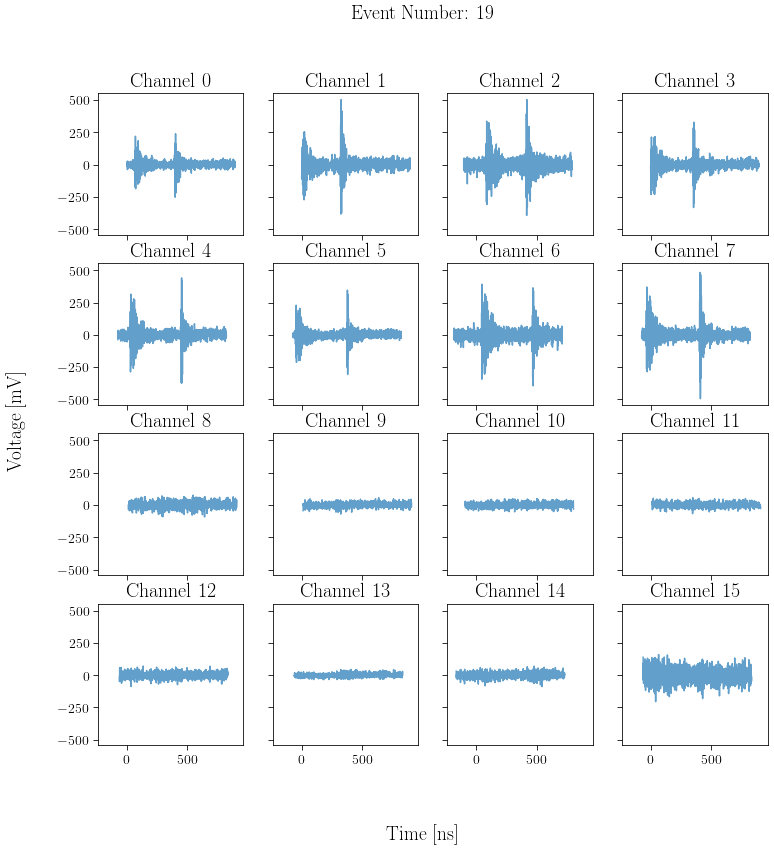

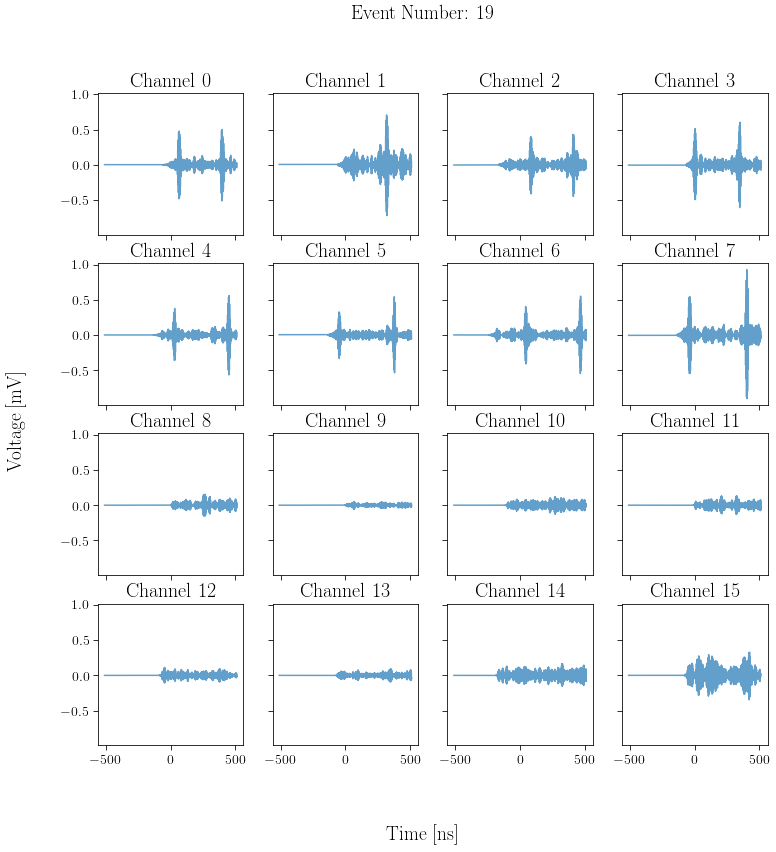

AraEventCalibrator::loadAtriCalib(): INFO - Vadj reference file = /users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build//share/araCalib/ATRI/araAtriStation2VadjRef.txt
AraEventCalibrator::loadAtriCalib(): INFO - Calibration file = /users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build//share/araCalib/ATRI/araAtriStation2SampleTimingNew.txt
AraEventCalibrator::loadAtriCalib(): INFO - Voltage-calibration file = /users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build//share/araCalib/ATRI/araAtriStation2adcToVoltsConv.txt
AraEventCalibrator::loadAtriCalib(): INFO - high voltage-calibration file = /users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build//share/araCalib/ATRI/araAtriStation2highAdcToVoltsConv.txt
loadAtriPedestals : Loading fAtriPedFile - /users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build//share/araCalib/ATRI/araAtriStation2Pedestals.txt
Unixtime of the chosen event is 1545617007 and it is after January 15th 2018
Opening 2018 SQliteDB using AraGeomTool::getStationInfo(

In [5]:
evt=19
eventTree.GetEntry(evt)
usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False)
plt.show()
# evt=0
eventTree2.GetEntry(evt)
util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
plt.show()

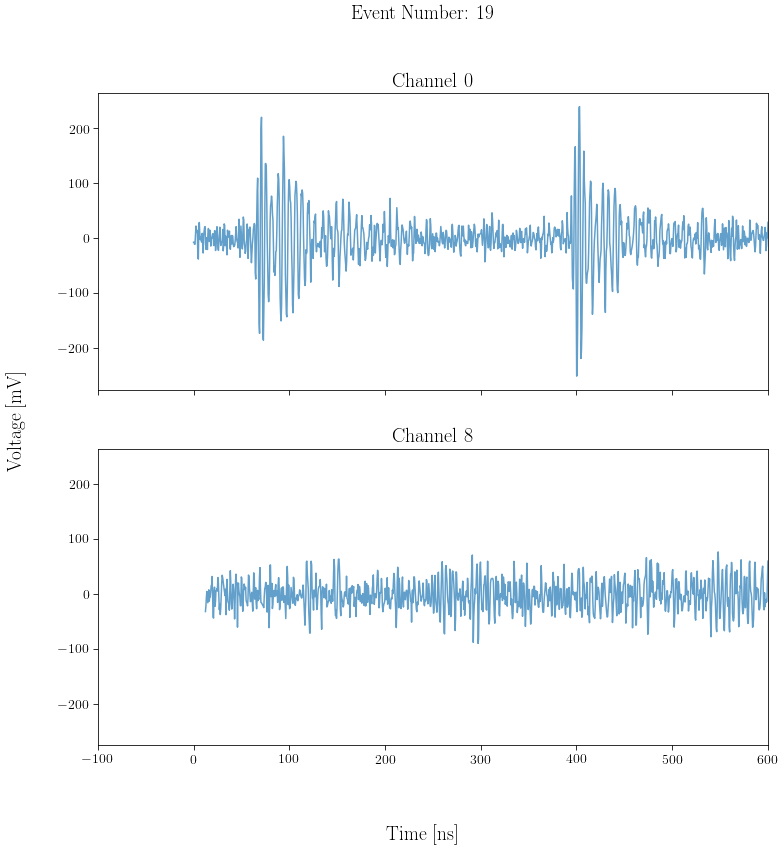

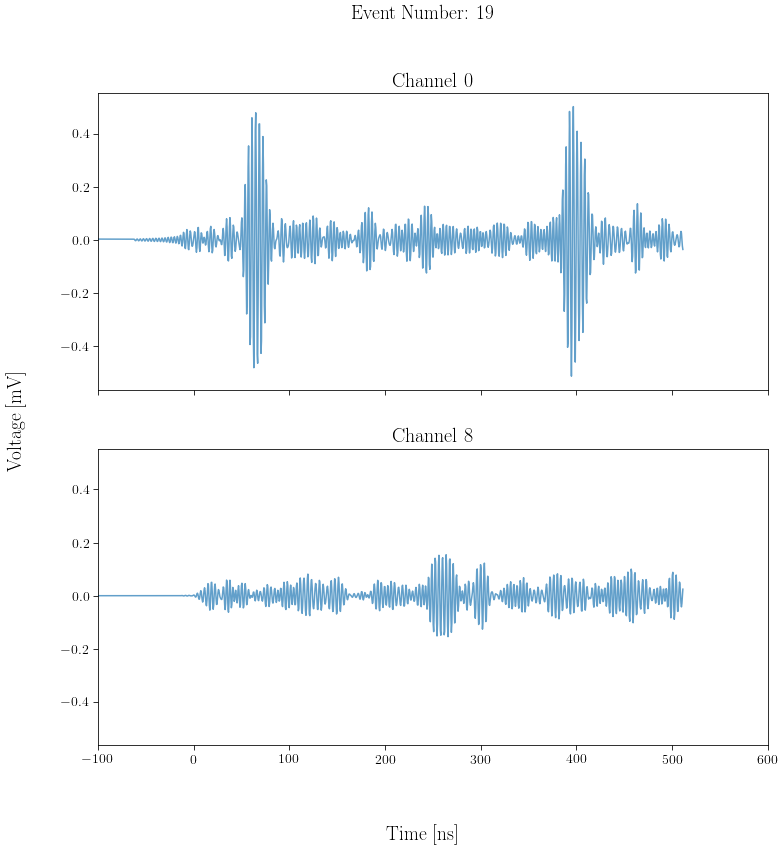

In [6]:
evt=19
channelPair=0
eventTree.GetEntry(evt)
usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False, channelPair=channelPair)
plt.xlim([-100,600])
plt.show()
# evt=0
eventTree2.GetEntry(evt)
util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False, channelPair=channelPair)
plt.xlim([-100,600])
plt.show()

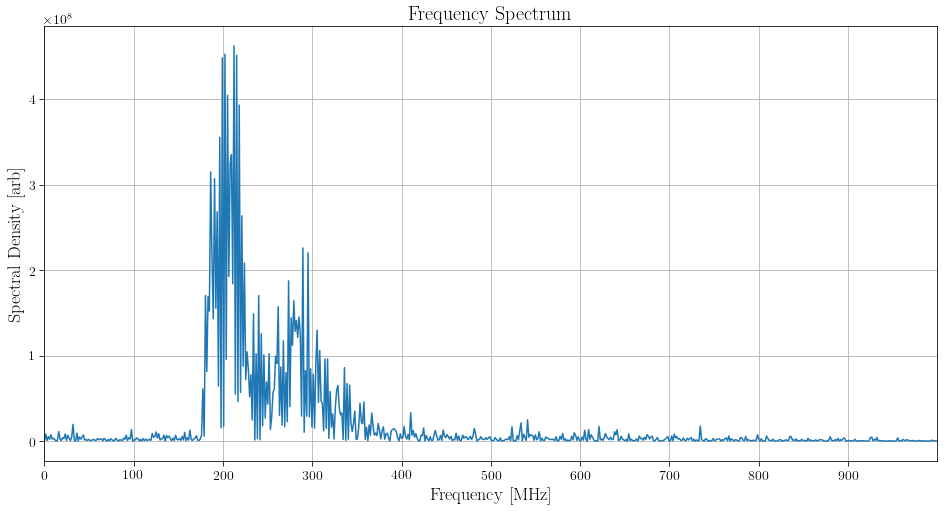

In [7]:
# Do fft of waveform to see what we should set bandpass to.
ch = 0
volts = np.array(usefulEvent.fVolts[ch])
times = np.array(usefulEvent.fTimes[ch])
fft, freq, dT = util.doFFT(times, volts)
psd = np.abs(fft**2)
fig = plt.figure(figsize=(16,8))
plt.plot(freq,psd)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Spectral Density [arb]")
plt.xticks(np.arange(0,1000,100))
plt.xlim([0,1000])
plt.grid()


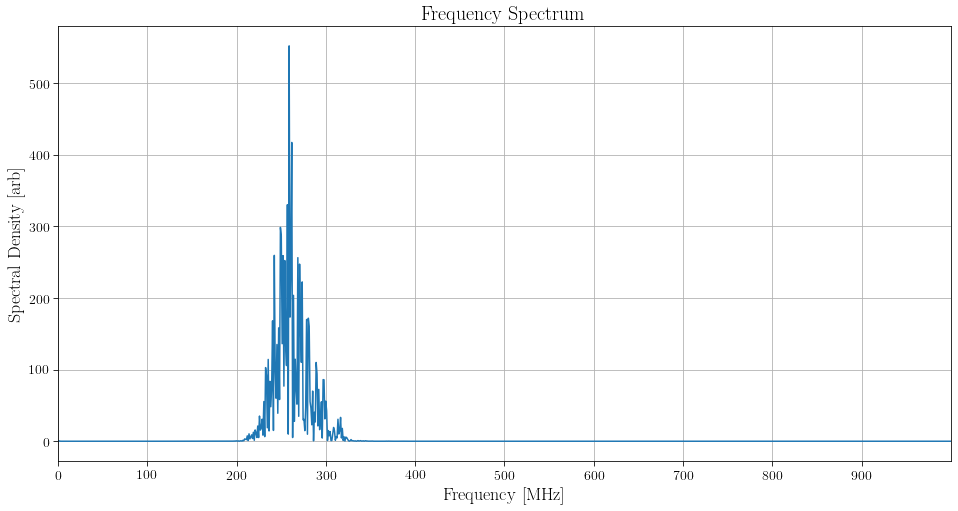

In [8]:
# Do fft of waveform to see what we should set bandpass to.
ch = 0
volts = np.array(usefulEvent2.fVolts[ch])
times = np.array(usefulEvent2.fTimes[ch])
fft, freq, dT = util.doFFT(times, volts)
psd = np.abs(fft**2)
fig = plt.figure(figsize=(16,8))
plt.plot(freq,psd)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Spectral Density [arb]")
plt.xticks(np.arange(0,1000,100))
plt.xlim([0,1000])
plt.grid()

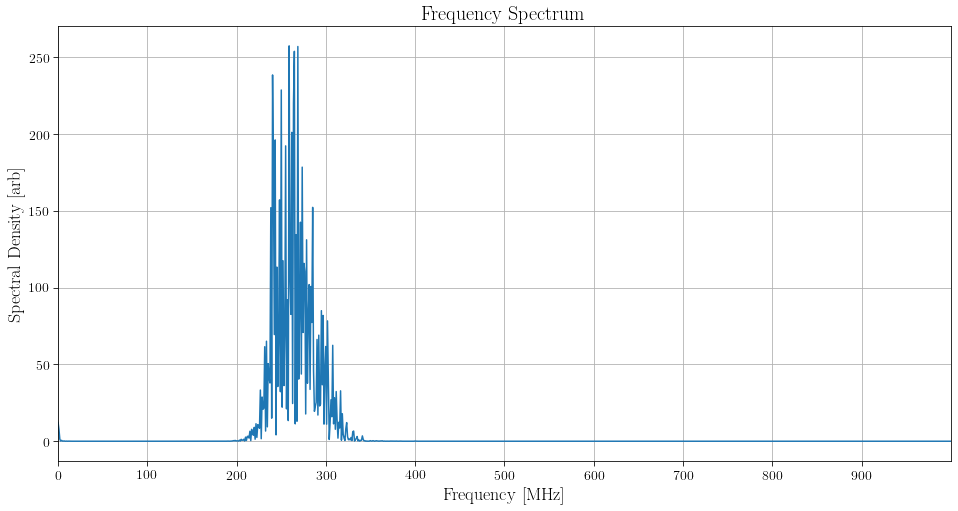

In [9]:
# Do fft of waveform to see what we should set bandpass to.
ch = 8
volts = np.array(usefulEvent2.fVolts[ch])
times = np.array(usefulEvent2.fTimes[ch])
fft, freq, dT = util.doFFT(times, volts)
psd = np.abs(fft**2)
fig = plt.figure(figsize=(16,8))
plt.plot(freq,psd)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Spectral Density [arb]")
plt.xticks(np.arange(0,1000,100))
plt.xlim([0,1000])
plt.grid()


In [10]:
# evt=13
# eventTree.GetEntry(evt)
# usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
# util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False)
# plt.show()
# # evt=14
# eventTree2.GetEntry(evt)
# util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
# plt.show()

In [11]:
# for evt in range(64):
#     eventTree2.GetEntry(evt)
#     # usefulEvent2 = ROOT.UsefulAtriStationEvent(rawEvent2,ROOT.AraCalType.kLatestCalib)
#     util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
#     plt.show()

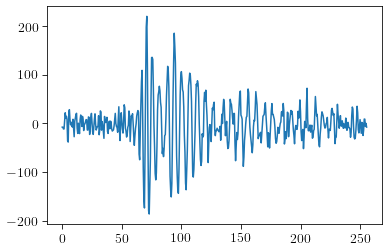

In [12]:
evt=19
ch=0
eventTree.GetEntry(evt)
usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
voltage, time = util.extractChannelWaveform(usefulEvent,ch)
NFOUR=1024
cutoff=512
plt.plot(time[:cutoff],voltage[:cutoff])




# util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False, channelPair=channelPair)
# plt.show()
# evt=0
# eventTree2.GetEntry(evt)
# util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False, channelPair=channelPair)
# # plt.xlim([0,900])
# plt.show()

In [13]:
usefulEvent2.isCalpulserEvent()

False

In [14]:
usefulEvent.isSoftwareTrigger()

False

In [15]:
usefulEvent2.unixTime

1545617007

In [16]:
usefulEvent.unixTime

1545617007

In [17]:
usefulEvent.isTrigType(2)

False

False
True
False
True


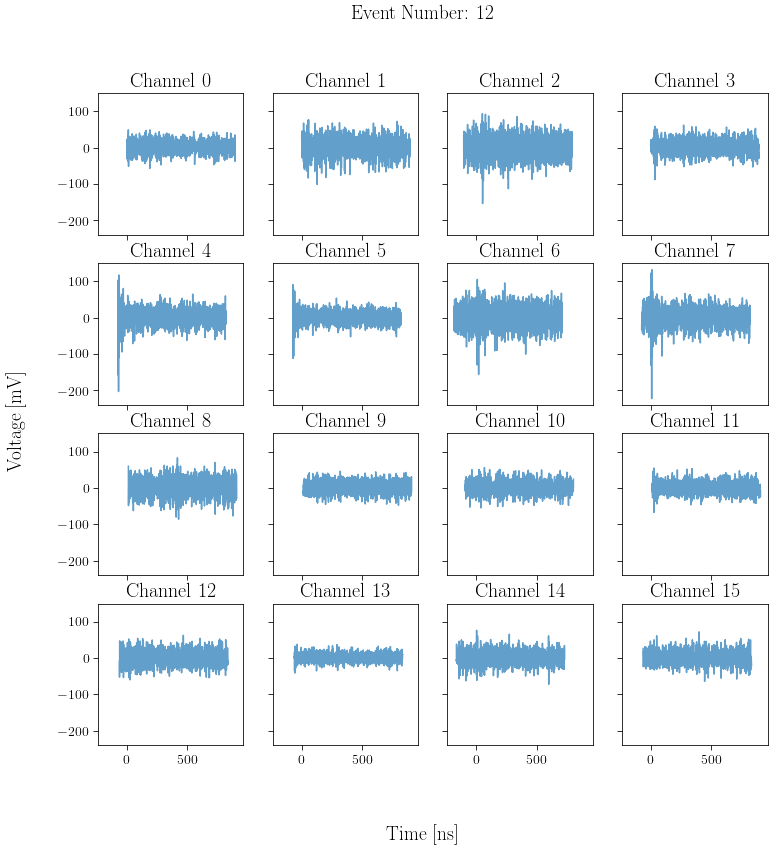

In [18]:
#Looking for calpulser event and checking its tag
evt=12
eventTree.GetEntry(evt)
eventTree2.GetEntry(evt)
usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
print(usefulEvent.isSoftwareTrigger())
print(usefulEvent.isCalpulserEvent())
print(usefulEvent2.isSoftwareTrigger())
print(usefulEvent2.isCalpulserEvent())
util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False)
plt.show()
# evt=0
# eventTree2.GetEntry(evt)
# util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
# plt.show()

In [19]:
usefulEvent.timeStamp

259

In [20]:
usefulEvent2.timeStamp

259

In [21]:
# print(usefulEvent.isTrigType(0))
# print(usefulEvent.isTrigType(1))
# print(usefulEvent.isTrigType(2))

In [22]:
# print(usefulEvent2.isTrigType(0))
# print(usefulEvent2.isTrigType(1))
# print(usefulEvent2.isTrigType(2))

In [23]:
# np.array(usefulEvent.triggerInfo)

In [24]:
# np.array(usefulEvent2.triggerInfo)

In [25]:
numEntries = eventTree2.GetEntries()
for evt in range(numEntries):
    eventTree2.GetEntry(evt)
    if (usefulEvent2.isCalpulserEvent()):
        print("Event " + str(evt) + " is a calpulser")
    elif (usefulEvent2.isSoftwareTrigger()):
        print("Event " + str(evt) + " is a soft trigger")
    else:
        print("Event " + str(evt) + " is a RF event.")

Event 0 is a RF event.
Event 1 is a RF event.
Event 2 is a RF event.
Event 3 is a soft trigger
Event 4 is a soft trigger
Event 5 is a RF event.
Event 6 is a soft trigger
Event 7 is a soft trigger
Event 8 is a soft trigger
Event 9 is a RF event.
Event 10 is a RF event.
Event 11 is a RF event.
Event 12 is a calpulser
Event 13 is a RF event.
Event 14 is a RF event.
Event 15 is a RF event.
Event 16 is a RF event.
Event 17 is a RF event.
Event 18 is a soft trigger
Event 19 is a RF event.
Event 20 is a calpulser
Event 21 is a RF event.
Event 22 is a RF event.
Event 23 is a RF event.
Event 24 is a RF event.
Event 25 is a soft trigger
Event 26 is a RF event.
Event 27 is a RF event.
Event 28 is a RF event.
Event 29 is a RF event.
Event 30 is a RF event.
Event 31 is a calpulser
Event 32 is a RF event.
Event 33 is a RF event.
Event 34 is a RF event.
Event 35 is a RF event.
Event 36 is a soft trigger
Event 37 is a RF event.
Event 38 is a RF event.
Event 39 is a calpulser
Event 40 is a soft trigger

In [26]:
# eventTree2.GetEntry(0)